In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15093, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15093 (delta 0), reused 3 (delta 0), pack-reused 15088
Receiving objects: 100% (15093/15093), 13.63 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (10436/10436), done.


In [2]:
pwd

'/content'

In [3]:
%cd yolo5

[Errno 2] No such file or directory: 'yolo5'
/content


In [4]:
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
     |████████████████████████████████| 41 kB 609 kB/s 
     |████████████████████████████████| 145 kB 9.3 MB/s 
     |████████████████████████████████| 138 kB 62.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 178 kB 64.7 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 


In [5]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [6]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9jq21tmT9YL29VRpS3ZY")
project = rf.workspace("gjai").project("minzo_ddaddak")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MINZO_DDADDAK!!-1 in yolov5pytorch:: 100%|██████████| 2408/2408 [00:00<00:00, 2815.05it/s]


In [ ]:
pwd

'/content'

In [8]:
%cd yolov5

/content/yolov5


In [9]:
#폴더명 dataset으로 바꾸기
%cat /content/dataset/data.yaml

cat: /content/dataset/data.yaml: No such file or directory


In [ ]:
# 테스트 트레인 밸리데이션 경로 설정 다시 해준다..

In [10]:
pwd

'/content/yolov5'

In [11]:
cd ..

/content


In [14]:
%cd dataset #폴더 이름 바꿔주기

[Errno 2] No such file or directory: 'dataset #폴더 이름 바꿔주기'
/content


In [15]:
import yaml

In [16]:
with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

{'names': ['A_body', 'A_head', 'B_body', 'B_head', 'C_body', 'C_head', 'D_body', 'D_head', 'E_body', 'E_head'], 'nc': 10, 'roboflow': {'license': 'CC BY 4.0', 'project': 'minzo_ddaddak', 'url': 'https://universe.roboflow.com/project/minzo_ddaddak/dataset/1', 'version': 1, 'workspace': 'project'}, 'test': '../test/images', 'train': 'MINZO_DDADDAK!!-1/train/images', 'val': 'MINZO_DDADDAK!!-1/valid/images'}


In [23]:
data['train'] = '/content/dataset/'
data['test'] = '/content/dataset/'
data['val'] = '/content/dataset/'  # 폴더랑 [] val로 바꿔주기
print(data)

{'names': ['A_body', 'A_head', 'B_body', 'B_head', 'C_body', 'C_head', 'D_body', 'D_head', 'E_body', 'E_head'], 'nc': 10, 'roboflow': {'license': 'CC BY 4.0', 'project': 'minzo_ddaddak', 'url': 'https://universe.roboflow.com/project/minzo_ddaddak/dataset/1', 'version': 1, 'workspace': 'project'}, 'test': '/content/dataset/', 'train': '/content/dataset/', 'val': '/content/dataset/', 'valid': '/content/dataset/'}


In [24]:
with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['A_body', 'A_head', 'B_body', 'B_head', 'C_body', 'C_head', 'D_body', 'D_head', 'E_body', 'E_head'], 'nc': 10, 'roboflow': {'license': 'CC BY 4.0', 'project': 'minzo_ddaddak', 'url': 'https://universe.roboflow.com/project/minzo_ddaddak/dataset/1', 'version': 1, 'workspace': 'project'}, 'test': '/content/dataset/', 'train': '/content/dataset/', 'val': '/content/dataset/', 'valid': '/content/dataset/'}


In [25]:
%cd /content/yolov5/

/content/yolov5


In [26]:
!python train.py --img 640 --batch 16 --epochs 30 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name min_yolov5s_results

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=min_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [44]:
%cd /content/yolov5/
from glob import glob

img_list = glob('/content/dataset/test/images/*.png')  #test 이미지 찾기   # png로 다시 보기
img_list_num = (len(img_list))
print(img_list)

/content/yolov5
['/content/dataset/test/images/10.png', '/content/dataset/test/images/1.png', '/content/dataset/test/images/100.png']


In [ ]:
# import glob
# from IPython.display import Image, display

# for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
#     display(Image(filename=imageName))
#     print("\n")

In [45]:
from IPython.display import Image
import os
from random import randrange

#여기선 detect.py를 이용해서 detect를 진행합니다.
#가중치나 path를 전달할때, "{}"를 이용하시면 변수값이 들어갑니다.

test_img_path = img_list[1]
weights_path = '/content/yolov5/runs/train/min_yolov5s_results3/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 640 --conf 0.5 --source "{test_img_path}"
#img 사진크기 conf는 수치 이하


detect: weights=['/content/yolov5/runs/train/min_yolov5s_results3/weights/best.pt'], source=/content/dataset/test/images/1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/test/images/1.png: 640x288 (no detections), 12.2ms
Speed: 0.4ms pre-process, 12.2ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


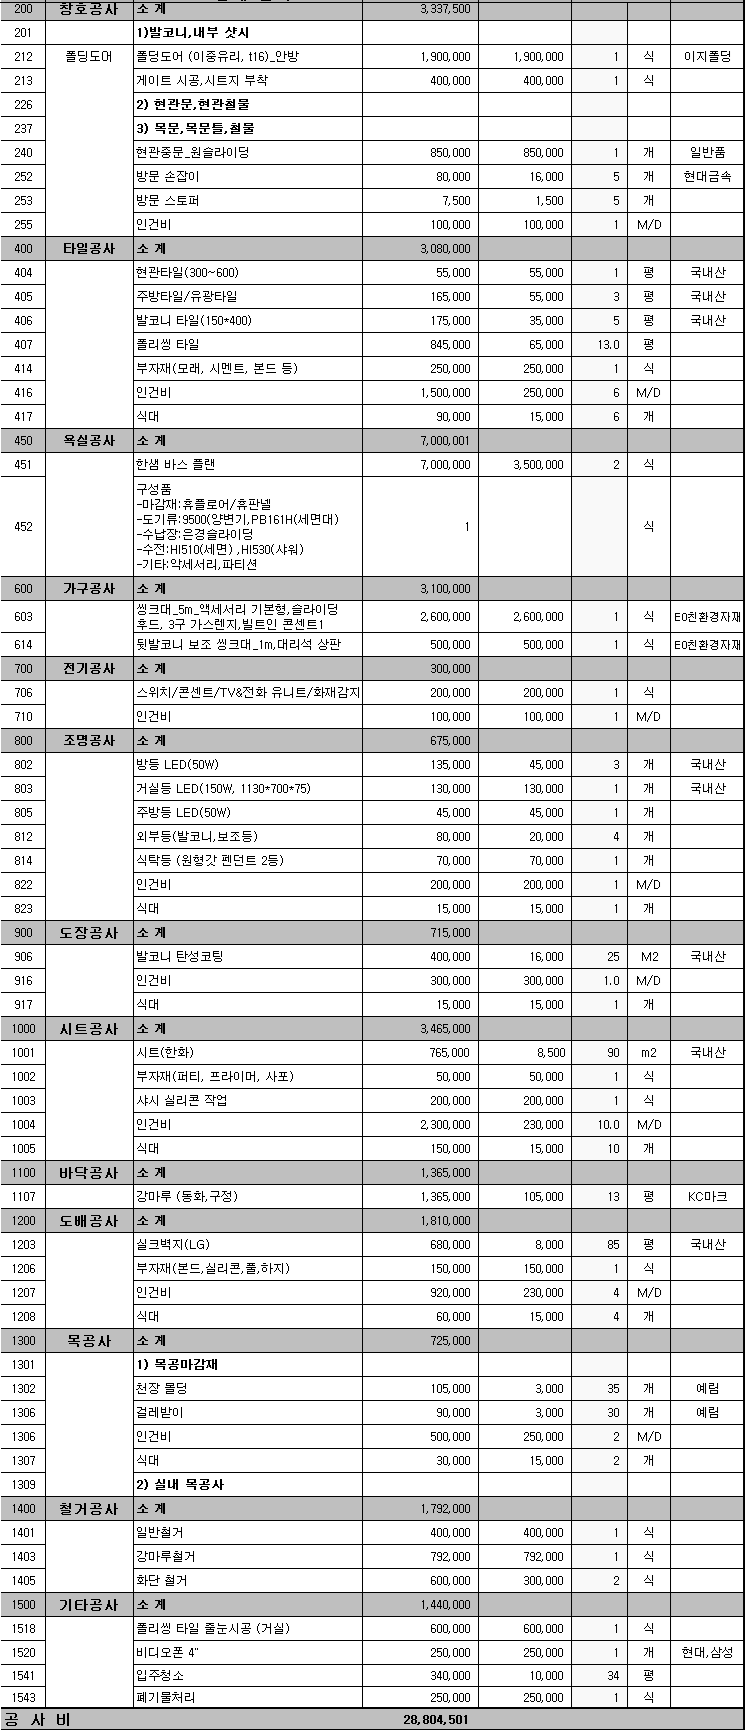

In [46]:
detect_img_path = '/content/yolov5/runs/detect/exp8'  #위에서 알려준 저장된 경로 변수에 넣기  ex)Results saved to runs/detect/exp9


Image(os.path.join(detect_img_path, os.path.basename(test_img_path)))  #인자로 받은 경로를 합쳐줌  basename은 그냥 기본 명령어 인자 그대로 쓸 때 IPython은 주피터에서 씀 I

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
